In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder

%matplotlib inline

In [197]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train (2).csv


In [199]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['loan_train.csv']))
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [200]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [201]:
df_train.shape

(614, 13)

In [202]:
pd.crosstab(df_train["Credit_History"],df_train["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


credit history of 1 are more eligible for loan

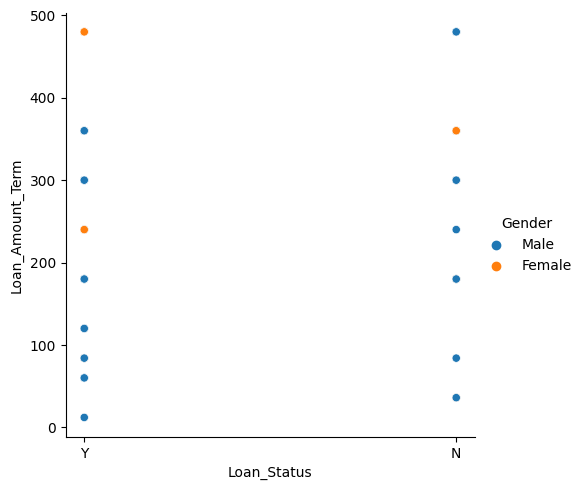

In [203]:
sns.relplot(x=df_train["Loan_Status"],y=df_train["Loan_Amount_Term"],hue=df_train["Gender"])
# plt.ylabel("Amount")
# plt.xlabel("loan status")
# plt.show()

# HANDLING MISSING VALUES CATEGORICAL VALUES


In [204]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [205]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0],inplace=True)
df_train["Dependents"].fillna(df_train["Dependents"].mode()[0],inplace=True)
df_train["Self_Employed"].fillna(df_train["Self_Employed"].mode()[0],inplace=True)
df_train["Credit_History"].fillna(df_train["Credit_History"].mode()[0],inplace=True)


In [206]:
df_train["Married"].fillna(df_train["Married"].mode()[0],inplace=True)


In [207]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# HANDLING MISSING VALUE NON CATEGORICAL

In [208]:
df_train["LoanAmount"]=df_train["LoanAmount"].fillna(df_train["LoanAmount"].mean())

df_train["Loan_Amount_Term"]=df_train["Loan_Amount_Term"].fillna(df_train["Loan_Amount_Term"].mean())

In [209]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# NORMALIZING


In [210]:
df_train["Totalincome"]=df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]
df_train["Totalincome_log"]=np.log(df_train["Totalincome"])

<Axes: >

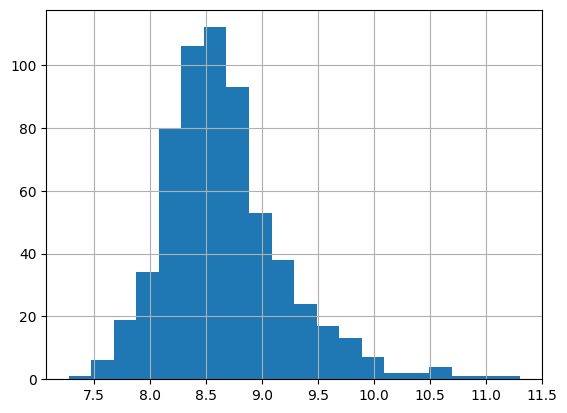

In [211]:
df_train['Totalincome_log'].hist(bins=20)

# DIVIDE DATA

In [212]:
le= LabelEncoder()
df_train["Gender"]=le.fit_transform(df_train["Gender"])
df_train["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [213]:

df_train["Married"]=le.fit_transform(df_train["Married"])
df_train["Married"].value_counts()

df_train["Self_Employed"]=le.fit_transform(df_train["Self_Employed"])
df_train["Self_Employed"].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [214]:
df_train["Education"]=le.fit_transform(df_train["Education"])
df_train["Education"].value_counts()

df_train["Loan_Status"]=le.fit_transform(df_train["Loan_Status"])
df_train["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [215]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Totalincome,Totalincome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0,8.699515


# SPLITTING DATASET

In [216]:
x=df_train.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df_train.iloc[:,12].values

In [217]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [218]:
le= LabelEncoder()

In [219]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
for i in range(0,5):
    x_train[:,i] = le.fit_transform(x_train[:,i])

In [220]:
x_train[:,7]=le.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 267],
       [1, 0, 1, ..., 1.0, 11250.0, 407],
       [1, 1, 0, ..., 0.0, 5681.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 363],
       [1, 1, 0, ..., 1.0, 6033.0, 273],
       [0, 1, 0, ..., 1.0, 6486.0, 301]], dtype=object)

In [221]:
ley= LabelEncoder()
y_train=ley.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [222]:
for i in range(0,5):
    x_test[:,i] = le.fit_transform(x_test[:,i])

x_test[:,7]=le.fit_transform(x_test[:,7])


In [223]:
y_train=ley.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

# SVM

In [224]:
s= StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)
clf=svm.SVC()

In [225]:
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print("accuracy of svm: ", accuracy_score(y_test,ypred))

accuracy of svm:  0.8292682926829268


In [226]:
classification_report(y_test,ypred)


'              precision    recall  f1-score   support\n\n           0       0.88      0.42      0.57        33\n           1       0.82      0.98      0.89        90\n\n    accuracy                           0.83       123\n   macro avg       0.85      0.70      0.73       123\nweighted avg       0.84      0.83      0.81       123\n'

# Decision tree algorithm

In [227]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
DTC = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [229]:
y_predd=DTC.predict(x_test  )
y_predd

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [230]:
print("accuracy of decision tree: ", accuracy_score(y_predd,y_test))

accuracy of decision tree:  0.6016260162601627


In [231]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train,
                                         y_pred))

Accuracy score of  RandomForestClassifier = 95.72301425661914
Accuracy score of  KNeighborsClassifier = 83.70672097759673
Accuracy score of  SVC = 81.26272912423626
Accuracy score of  LogisticRegression = 80.44806517311609


In [232]:
from google.colab import files
uploaded1 = files.upload()

Saving loan_test.csv to loan_test (6).csv


In [233]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded1['loan_test.csv']))
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [234]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred1 = clf.predict(x_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test,
                                     y_pred1))

Accuracy score of  RandomForestClassifier = 73.17073170731707
Accuracy score of  KNeighborsClassifier = 77.23577235772358
Accuracy score of  SVC = 82.92682926829268
Accuracy score of  LogisticRegression = 82.92682926829268


In [239]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_test,y_test)

GaussianNB()

In [240]:
y_prednb=NB.predict(x_test)
y_prednb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [241]:
print("accuracy of naive bayes:", accuracy_score(y_test,y_prednb))

accuracy of naive bayes: 0.8536585365853658


# test data

In [242]:
from google.colab import files
uploaded1 = files.upload()

Saving loan_test.csv to loan_test (7).csv


In [243]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded1['loan_test.csv']))
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [244]:
df_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [245]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [246]:
df_test["Gender"].fillna(df_test["Gender"].mode()[0],inplace=True)
df_test["Married"].fillna(df_test["Married"].mode()[0],inplace=True)
df_test["Dependents"].fillna(df_test["Dependents"].mode()[0],inplace=True)
df_test["Self_Employed"].fillna(df_test["Self_Employed"].mode()[0],inplace=True)
df_test["Credit_History"].fillna(df_test["Credit_History"].mode()[0],inplace=True)

In [247]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [248]:
df_test["LoanAmount"]=df_test["LoanAmount"].fillna(df_test["LoanAmount"].mean())
df_test["Loan_Amount_Term"]=df_test["Loan_Amount_Term"].fillna(df_test["Loan_Amount_Term"].mean())

In [249]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [250]:
df_test["Totalincome"]=df_test["ApplicantIncome"]+df_test["CoapplicantIncome"]
df_test["Totalincome_log"]=np.log(df_test["Totalincome"])

<Axes: >

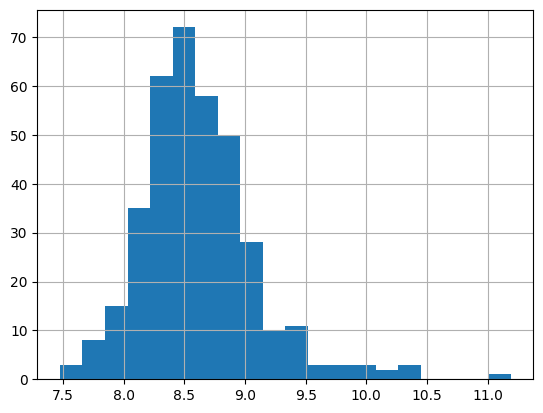

In [251]:
df_test['Totalincome_log'].hist(bins=20)

In [252]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Totalincome,Totalincome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378


In [253]:
testt= df_test.iloc[:,np.r_[1:5,9:11,12:14]].values


In [254]:
for i in range(0,5):
    testt[:,i]=le.fit_transform(testt[:,i])

In [255]:
testt[:,7]=le.fit_transform(testt[:,7])

In [256]:
testt

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [257]:
testt=s.fit_transform(testt)

In [258]:
predd=NB.predict(testt)
predd

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,